In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
from IPython.display import Image as IPImage, display, clear_output
import os

# Clear previous output to avoid duplicates
clear_output(wait=True)

# Ensure required libraries are installed
try:
    import matplotlib
    import numpy
    import pandas
    from PIL import Image
except ImportError as e:
    print(f"Missing library: {e}. Install with: pip install matplotlib numpy pandas pillow")
    raise

# Load data from CSV
csv_file = "hospital-ratios.csv"
try:
    df = pd.read_csv(csv_file)
    # Verify required columns
    required_columns = [
        "Hospital Name", "Debt to Equity Ratio", "Days Cash on Hand",
        "Days Sales Outstanding", "Bad Debt to Accounts Receivable Ratio",
        "Labor Compensation Ratio", "Asset Turnover"
    ]
    if not all(col in df.columns for col in required_columns):
        missing = [col for col in required_columns if col not in df.columns]
        raise ValueError(f"CSV missing required columns: {missing}")
except FileNotFoundError:
    print(f"Error: '{csv_file}' not found in the working directory: {os.getcwd()}")
    print("Please ensure the CSV file is in the correct directory or provide the full path.")
    raise
except Exception as e:
    print(f"Error reading CSV file: {e}")
    raise

# Function to wrap text for PIL
def wrap_text(text, font, max_width):
    lines = []
    for paragraph in text.split('\n'):
        words = paragraph.split()
        current_line = []
        current_width = 0
        for word in words:
            word_width = font.getbbox(word + ' ')[2]
            if current_width + word_width <= max_width:
                current_line.append(word)
                current_width += word_width
            else:
                lines.append(' '.join(current_line))
                current_line = [word]
                current_width = word_width
        if current_line:
            lines.append(' '.join(current_line))
        lines.append('')  # Add empty line for paragraph break
    return [line for line in lines if line]

Chart 1: Debt to Equity Ratio (Top 5 Hospitals)


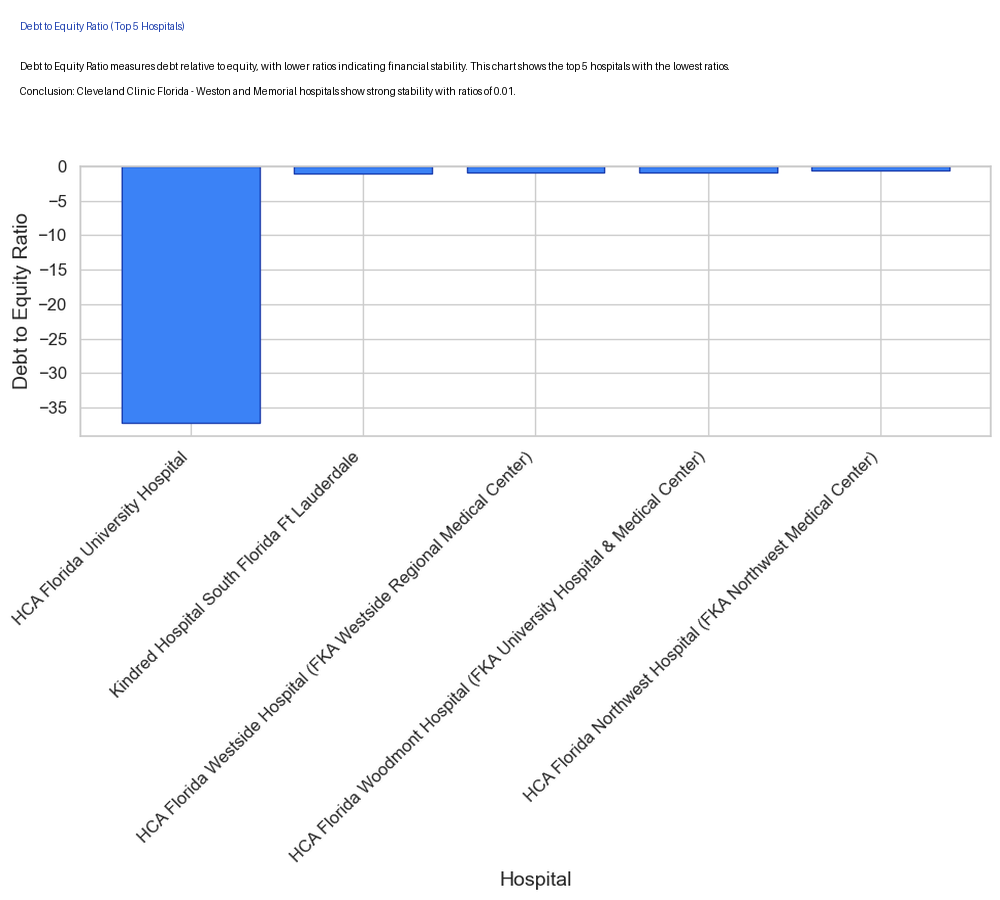

In [11]:
# Chart 1: Debt to Equity Ratio
chart = {
    "title": "Debt to Equity Ratio (Top 5 Hospitals)",
    "description": "Debt to Equity Ratio measures debt relative to equity, with lower ratios indicating financial stability. This chart shows the top 5 hospitals with the lowest ratios.\nConclusion: Cleveland Clinic Florida - Weston and Memorial hospitals show strong stability with ratios of 0.01.",
    "type": "bar",
    "data": df.sort_values("Debt to Equity Ratio").head(5)[["Hospital Name", "Debt to Equity Ratio"]],
    "x": "Hospital Name",
    "y": "Debt to Equity Ratio",
    "color": "#3B82F6",
    "xlabel": "Hospital",
    "ylabel": "Debt to Equity Ratio"
}

try:
    # Create figure (1000x750 pixels, ~10x7.5 inches at 100 DPI)
    fig = plt.figure(figsize=(10, 7.5), dpi=100)
    plt.bar(chart["data"][chart["x"]], chart["data"][chart["y"]], color=chart["color"], edgecolor="#1E40AF")
    plt.xlabel(chart["xlabel"], fontsize=14)
    plt.ylabel(chart["ylabel"], fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # Save chart to memory
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    plt.close()
    
    # Create final image with title and description
    final_image = Image.new('RGB', (1000, 900), 'white')
    draw = ImageDraw.Draw(final_image)
    
    # Load fonts with fallbacks
    try:
        title_font = ImageFont.truetype("arialbd.ttf", 20) if os.path.exists("arialbd.ttf") else \
                     ImageFont.truetype("DejaVuSans-Bold.ttf", 20) if os.path.exists("DejaVuSans-Bold.ttf") else \
                     ImageFont.truetype("LiberationSans-Bold.ttf", 20) if os.path.exists("LiberationSans-Bold.ttf") else \
                     ImageFont.truetype("Helvetica-Bold.ttf", 20) if os.path.exists("Helvetica-Bold.ttf") else \
                     ImageFont.load_default()
        text_font = ImageFont.truetype("arial.ttf", 16) if os.path.exists("arial.ttf") else \
                    ImageFont.truetype("DejaVuSans.ttf", 16) if os.path.exists("DejaVuSans.ttf") else \
                    ImageFont.truetype("LiberationSans-Regular.ttf", 16) if os.path.exists("LiberationSans-Regular.ttf") else \
                    ImageFont.truetype("Helvetica.ttf", 16) if os.path.exists("Helvetica.ttf") else \
                    ImageFont.load_default()
    except Exception as e:
        print(f"Font loading failed: {e}. Using default PIL font.")
        title_font = ImageFont.load_default()
        text_font = ImageFont.load_default()
    
    # Draw title and description
    draw.text((20, 20), chart["title"], fill="#1E40AF", font=title_font)
    wrapped_text = wrap_text(chart["description"], text_font, 960)
    y_text = 60
    for line in wrapped_text:
        draw.text((20, y_text), line, fill="black", font=text_font)
        y_text += 25
    
    # Paste chart image
    buf.seek(0)
    chart_image = Image.open(buf)
    chart_image = chart_image.resize((1000, 750), Image.Resampling.LANCZOS)
    final_image.paste(chart_image, (0, 150))
    
    # Display
    buf_display = BytesIO()
    final_image.save(buf_display, format='png')
    buf_display.seek(0)
    print(f"Chart 1: {chart['title']}")
    display(IPImage(buf_display.read()))
    buf.close()
    buf_display.close()
except Exception as e:
    print(f"Error generating Chart 1 ({chart['title']}): {e}")
    plt.close()

Chart 2: Days Cash on Hand (Top 5 Hospitals)


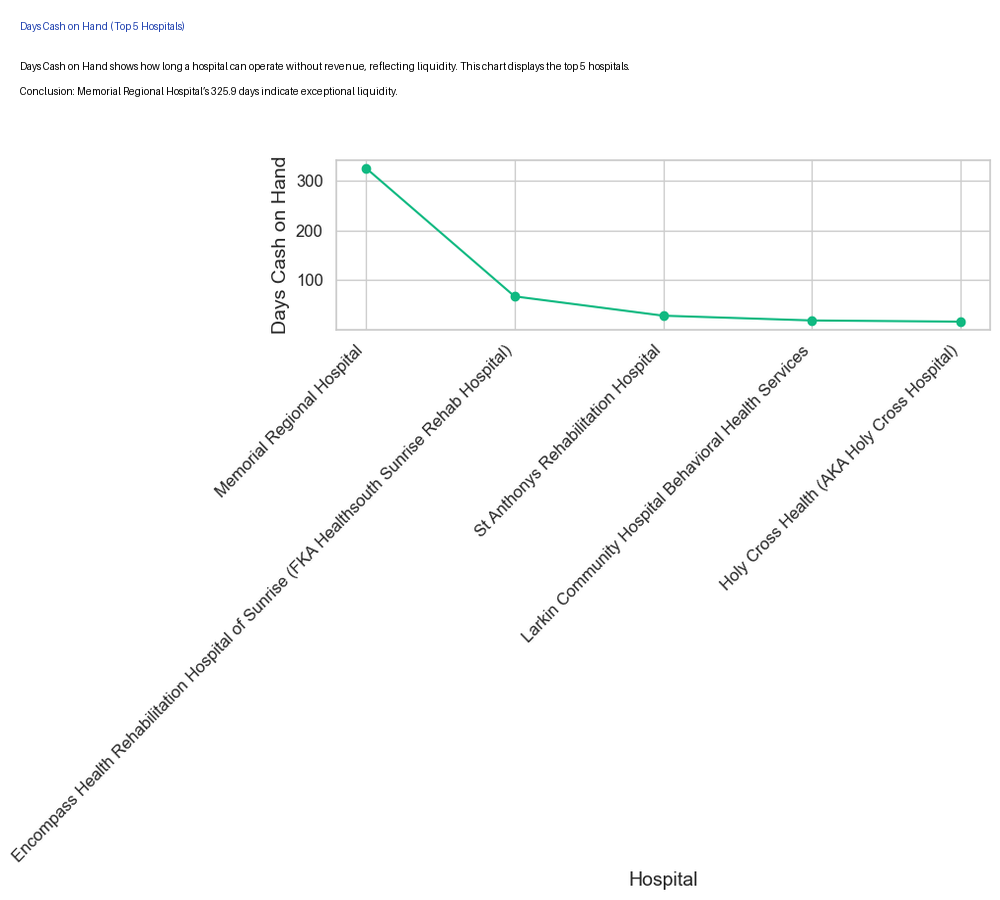

In [12]:
# Chart 2: Days Cash on Hand
chart = {
    "title": "Days Cash on Hand (Top 5 Hospitals)",
    "description": "Days Cash on Hand shows how long a hospital can operate without revenue, reflecting liquidity. This chart displays the top 5 hospitals.\nConclusion: Memorial Regional Hospital’s 325.9 days indicate exceptional liquidity.",
    "type": "line",
    "data": df.sort_values("Days Cash on Hand", ascending=False).head(5)[["Hospital Name", "Days Cash on Hand"]],
    "x": "Hospital Name",
    "y": "Days Cash on Hand",
    "color": "#10B981",
    "xlabel": "Hospital",
    "ylabel": "Days Cash on Hand"
}

try:
    # Create figure
    fig = plt.figure(figsize=(10, 7.5), dpi=100)
    plt.plot(chart["data"][chart["x"]], chart["data"][chart["y"]], color=chart["color"], marker='o')
    plt.xlabel(chart["xlabel"], fontsize=14)
    plt.ylabel(chart["ylabel"], fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # Save chart to memory
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    plt.close()
    
    # Create final image
    final_image = Image.new('RGB', (1000, 900), 'white')
    draw = ImageDraw.Draw(final_image)
    
    # Load fonts
    try:
        title_font = ImageFont.truetype("arialbd.ttf", 20) if os.path.exists("arialbd.ttf") else \
                     ImageFont.truetype("DejaVuSans-Bold.ttf", 20) if os.path.exists("DejaVuSans-Bold.ttf") else \
                     ImageFont.truetype("LiberationSans-Bold.ttf", 20) if os.path.exists("LiberationSans-Bold.ttf") else \
                     ImageFont.truetype("Helvetica-Bold.ttf", 20) if os.path.exists("Helvetica-Bold.ttf") else \
                     ImageFont.load_default()
        text_font = ImageFont.truetype("arial.ttf", 16) if os.path.exists("arial.ttf") else \
                    ImageFont.truetype("DejaVuSans.ttf", 16) if os.path.exists("DejaVuSans.ttf") else \
                    ImageFont.truetype("LiberationSans-Regular.ttf", 16) if os.path.exists("LiberationSans-Regular.ttf") else \
                    ImageFont.truetype("Helvetica.ttf", 16) if os.path.exists("Helvetica.ttf") else \
                    ImageFont.load_default()
    except Exception as e:
        print(f"Font loading failed: {e}. Using default PIL font.")
        title_font = ImageFont.load_default()
        text_font = ImageFont.load_default()
    
    # Draw title and description
    draw.text((20, 20), chart["title"], fill="#1E40AF", font=title_font)
    wrapped_text = wrap_text(chart["description"], text_font, 960)
    y_text = 60
    for line in wrapped_text:
        draw.text((20, y_text), line, fill="black", font=text_font)
        y_text += 25
    
    # Paste chart image
    buf.seek(0)
    chart_image = Image.open(buf)
    chart_image = chart_image.resize((1000, 750), Image.Resampling.LANCZOS)
    final_image.paste(chart_image, (0, 150))
    
    # Display
    buf_display = BytesIO()
    final_image.save(buf_display, format='png')
    buf_display.seek(0)
    print(f"Chart 2: {chart['title']}")
    display(IPImage(buf_display.read()))
    buf.close()
    buf_display.close()
except Exception as e:
    print(f"Error generating Chart 2 ({chart['title']}): {e}")
    plt.close()

Chart 3: Bad Debt to Accounts Receivable Ratio (Top 5 Hospitals)


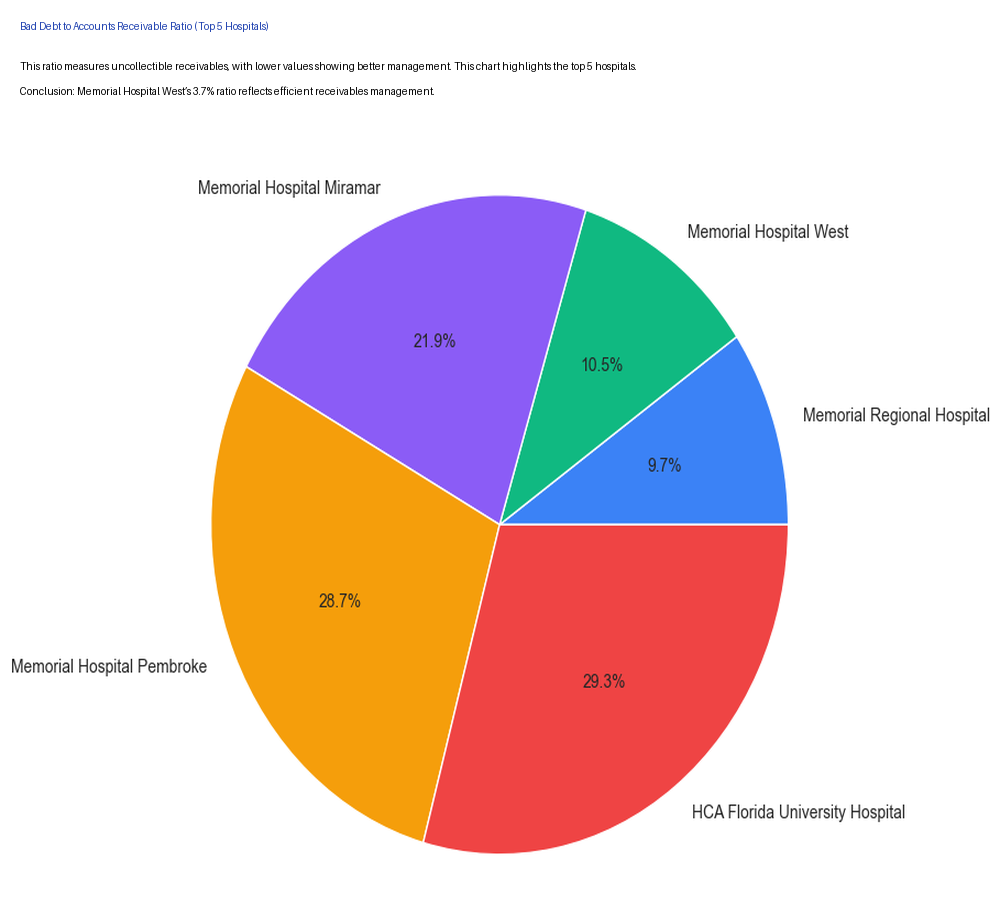

In [13]:
# Chart 3: Bad Debt to Accounts Receivable Ratio
chart = {
    "title": "Bad Debt to Accounts Receivable Ratio (Top 5 Hospitals)",
    "description": "This ratio measures uncollectible receivables, with lower values showing better management. This chart highlights the top 5 hospitals.\nConclusion: Memorial Hospital West’s 3.7% ratio reflects efficient receivables management.",
    "type": "pie",
    "data": df[df["Bad Debt to Accounts Receivable Ratio"] > 0].sort_values("Bad Debt to Accounts Receivable Ratio").head(5)[["Hospital Name", "Bad Debt to Accounts Receivable Ratio"]],
    "labels": "Hospital Name",
    "values": "Bad Debt to Accounts Receivable Ratio",
    "colors": ["#3B82F6", "#10B981", "#8B5CF6", "#F59E0B", "#EF4444"]
}

try:
    # Create figure
    fig = plt.figure(figsize=(10, 7.5), dpi=100)
    plt.pie(chart["data"][chart["values"]], labels=chart["data"][chart["labels"]], 
            colors=chart["colors"], autopct='%1.1f%%', textprops={'fontsize': 10})
    plt.axis('equal')
    
    # Save chart to memory
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    plt.close()
    
    # Create final image
    final_image = Image.new('RGB', (1000, 900), 'white')
    draw = ImageDraw.Draw(final_image)
    
    # Load fonts
    try:
        title_font = ImageFont.truetype("arialbd.ttf", 20) if os.path.exists("arialbd.ttf") else \
                     ImageFont.truetype("DejaVuSans-Bold.ttf", 20) if os.path.exists("DejaVuSans-Bold.ttf") else \
                     ImageFont.truetype("LiberationSans-Bold.ttf", 20) if os.path.exists("LiberationSans-Bold.ttf") else \
                     ImageFont.truetype("Helvetica-Bold.ttf", 20) if os.path.exists("Helvetica-Bold.ttf") else \
                     ImageFont.load_default()
        text_font = ImageFont.truetype("arial.ttf", 16) if os.path.exists("arial.ttf") else \
                    ImageFont.truetype("DejaVuSans.ttf", 16) if os.path.exists("DejaVuSans.ttf") else \
                    ImageFont.truetype("LiberationSans-Regular.ttf", 16) if os.path.exists("LiberationSans-Regular.ttf") else \
                    ImageFont.truetype("Helvetica.ttf", 16) if os.path.exists("Helvetica.ttf") else \
                    ImageFont.load_default()
    except Exception as e:
        print(f"Font loading failed: {e}. Using default PIL font.")
        title_font = ImageFont.load_default()
        text_font = ImageFont.load_default()
    
    # Draw title and description
    draw.text((20, 20), chart["title"], fill="#1E40AF", font=title_font)
    wrapped_text = wrap_text(chart["description"], text_font, 960)
    y_text = 60
    for line in wrapped_text:
        draw.text((20, y_text), line, fill="black", font=text_font)
        y_text += 25
    
    # Paste chart image
    buf.seek(0)
    chart_image = Image.open(buf)
    chart_image = chart_image.resize((1000, 750), Image.Resampling.LANCZOS)
    final_image.paste(chart_image, (0, 150))
    
    # Display
    buf_display = BytesIO()
    final_image.save(buf_display, format='png')
    buf_display.seek(0)
    print(f"Chart 3: {chart['title']}")
    display(IPImage(buf_display.read()))
    buf.close()
    buf_display.close()
except Exception as e:
    print(f"Error generating Chart 3 ({chart['title']}): {e}")
    plt.close()

Chart 4: Days Sales Outstanding vs. Asset Turnover (All Hospitals)


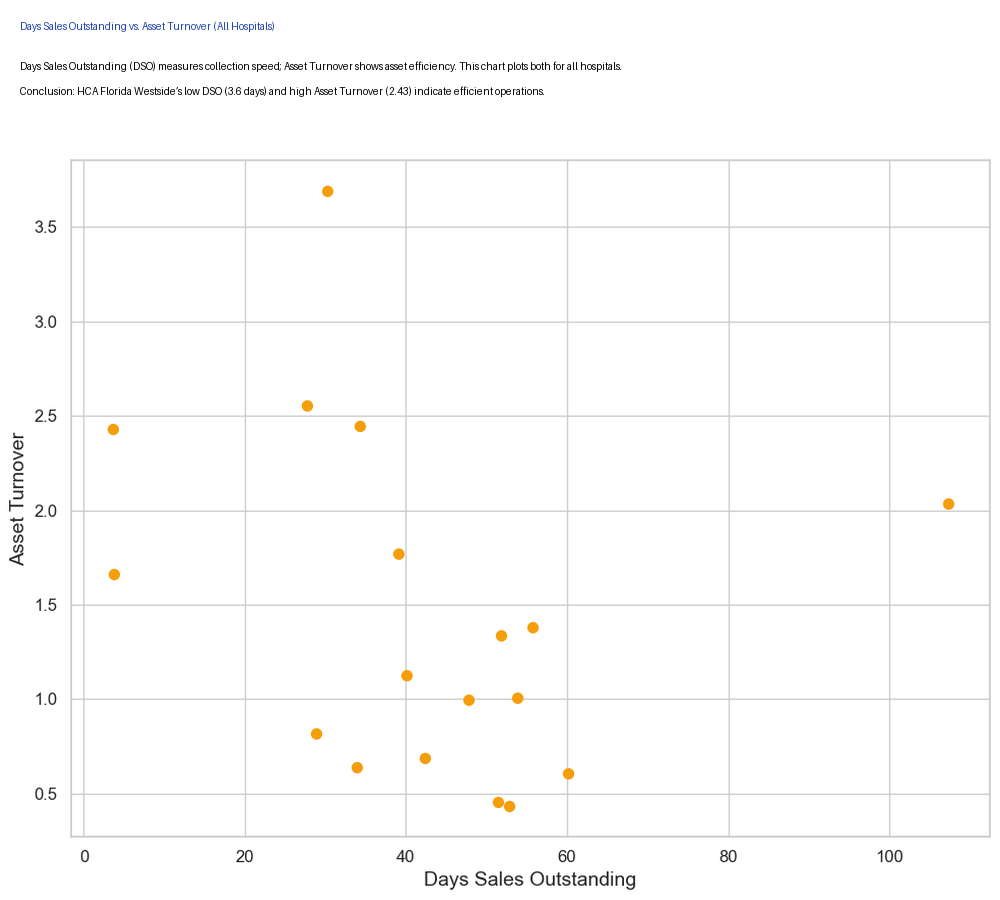

In [14]:
# Chart 4: Days Sales Outstanding vs. Asset Turnover
chart = {
    "title": "Days Sales Outstanding vs. Asset Turnover (All Hospitals)",
    "description": "Days Sales Outstanding (DSO) measures collection speed; Asset Turnover shows asset efficiency. This chart plots both for all hospitals.\nConclusion: HCA Florida Westside’s low DSO (3.6 days) and high Asset Turnover (2.43) indicate efficient operations.",
    "type": "scatter",
    "data": df[["Hospital Name", "Days Sales Outstanding", "Asset Turnover"]],
    "x": "Days Sales Outstanding",
    "y": "Asset Turnover",
    "color": "#F59E0B",
    "xlabel": "Days Sales Outstanding",
    "ylabel": "Asset Turnover"
}

try:
    # Create figure
    fig = plt.figure(figsize=(10, 7.5), dpi=100)
    plt.scatter(chart["data"][chart["x"]], chart["data"][chart["y"]], color=chart["color"], s=50)
    plt.xlabel(chart["xlabel"], fontsize=14)
    plt.ylabel(chart["ylabel"], fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # Save chart to memory
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    plt.close()
    
    # Create final image
    final_image = Image.new('RGB', (1000, 900), 'white')
    draw = ImageDraw.Draw(final_image)
    
    # Load fonts
    try:
        title_font = ImageFont.truetype("arialbd.ttf", 20) if os.path.exists("arialbd.ttf") else \
                     ImageFont.truetype("DejaVuSans-Bold.ttf", 20) if os.path.exists("DejaVuSans-Bold.ttf") else \
                     ImageFont.truetype("LiberationSans-Bold.ttf", 20) if os.path.exists("LiberationSans-Bold.ttf") else \
                     ImageFont.truetype("Helvetica-Bold.ttf", 20) if os.path.exists("Helvetica-Bold.ttf") else \
                     ImageFont.load_default()
        text_font = ImageFont.truetype("arial.ttf", 16) if os.path.exists("arial.ttf") else \
                    ImageFont.truetype("DejaVuSans.ttf", 16) if os.path.exists("DejaVuSans.ttf") else \
                    ImageFont.truetype("LiberationSans-Regular.ttf", 16) if os.path.exists("LiberationSans-Regular.ttf") else \
                    ImageFont.truetype("Helvetica.ttf", 16) if os.path.exists("Helvetica.ttf") else \
                    ImageFont.load_default()
    except Exception as e:
        print(f"Font loading failed: {e}. Using default PIL font.")
        title_font = ImageFont.load_default()
        text_font = ImageFont.load_default()
    
    # Draw title and description
    draw.text((20, 20), chart["title"], fill="#1E40AF", font=title_font)
    wrapped_text = wrap_text(chart["description"], text_font, 960)
    y_text = 60
    for line in wrapped_text:
        draw.text((20, y_text), line, fill="black", font=text_font)
        y_text += 25
    
    # Paste chart image
    buf.seek(0)
    chart_image = Image.open(buf)
    chart_image = chart_image.resize((1000, 750), Image.Resampling.LANCZOS)
    final_image.paste(chart_image, (0, 150))
    
    # Display
    buf_display = BytesIO()
    final_image.save(buf_display, format='png')
    buf_display.seek(0)
    print(f"Chart 4: {chart['title']}")
    display(IPImage(buf_display.read()))
    buf.close()
    buf_display.close()
except Exception as e:
    print(f"Error generating Chart 4 ({chart['title']}): {e}")
    plt.close()

Chart 5: Processing 5 hospitals with labels: ['Debt to Equity Ratio', 'Days Cash on Hand', 'Labor Compensation Ratio']
Chart 5: Financial Metrics Comparison (Top 5 by Days Cash on Hand)


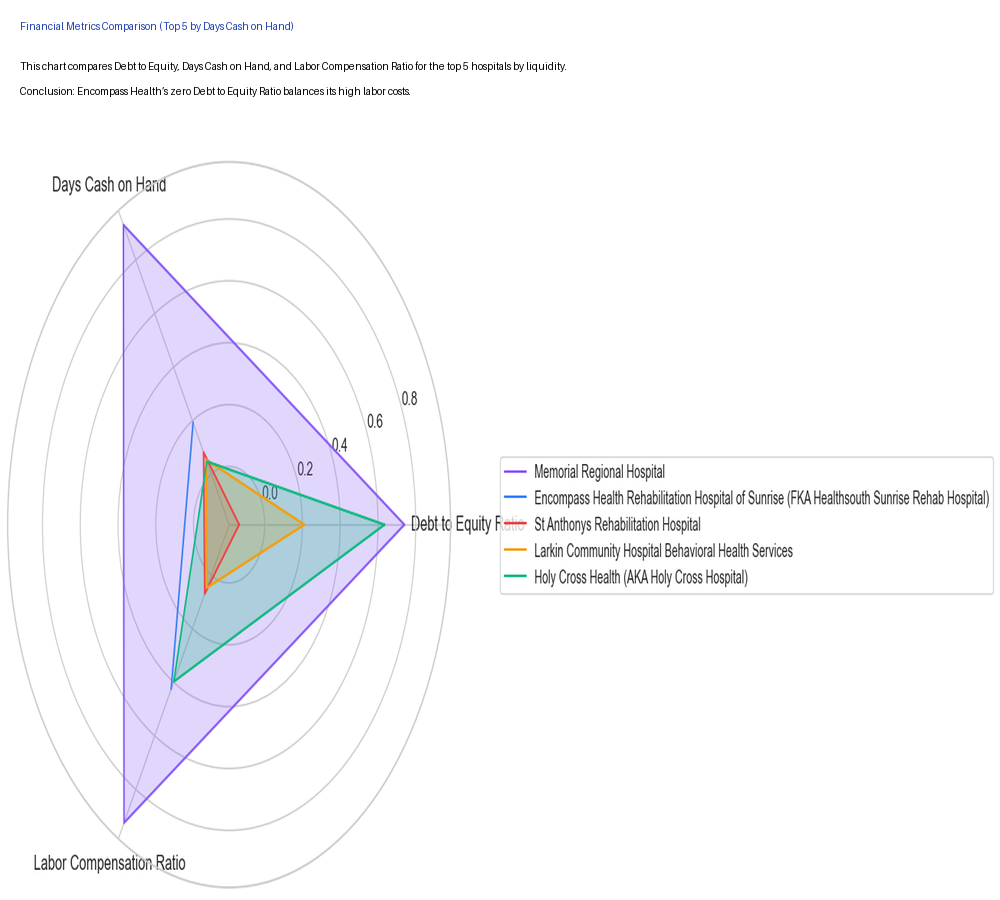

In [15]:
# Chart 5: Financial Metrics Comparison
chart = {
    "title": "Financial Metrics Comparison (Top 5 by Days Cash on Hand)",
    "description": "This chart compares Debt to Equity, Days Cash on Hand, and Labor Compensation Ratio for the top 5 hospitals by liquidity.\nConclusion: Encompass Health’s zero Debt to Equity Ratio balances its high labor costs.",
    "type": "radar",
    "data": df.sort_values("Days Cash on Hand", ascending=False).head(5)[["Hospital Name", "Debt to Equity Ratio", "Days Cash on Hand", "Labor Compensation Ratio"]],
    "labels": ["Debt to Equity Ratio", "Days Cash on Hand", "Labor Compensation Ratio"],
    "colors": ["#3B82F6", "#10B981", "#8B5CF6", "#F59E0B", "#EF4444"]
}

try:
    # Create figure
    fig = plt.figure(figsize=(10, 7.5), dpi=100)
    labels = chart["labels"]
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    print(f"Chart 5: Processing {len(chart['data'])} hospitals with labels: {labels}")
    for i, row in chart["data"].iterrows():
        # Normalize data to [0, 1] range
        values = row[labels].copy()
        max_values = [2.0, 350.0, 1.2]  # Fixed max values
        values = [v / max_v if max_v != 0 else v for v, max_v in zip(values, max_values)]
        values += values[:1]
        color = chart["colors"][i % len(chart["colors"])]  # Safe color access
        plt.polar(angles, values, label=row["Hospital Name"], color=color)
        plt.fill(angles, values, alpha=0.25, color=color)
    plt.xticks(angles[:-1], labels, fontsize=12)
    plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=10)
    
    # Save chart to memory
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    plt.close()
    
    # Create final image
    final_image = Image.new('RGB', (1000, 900), 'white')
    draw = ImageDraw.Draw(final_image)
    
    # Load fonts
    try:
        title_font = ImageFont.truetype("arialbd.ttf", 20) if os.path.exists("arialbd.ttf") else \
                     ImageFont.truetype("DejaVuSans-Bold.ttf", 20) if os.path.exists("DejaVuSans-Bold.ttf") else \
                     ImageFont.truetype("LiberationSans-Bold.ttf", 20) if os.path.exists("LiberationSans-Bold.ttf") else \
                     ImageFont.truetype("Helvetica-Bold.ttf", 20) if os.path.exists("Helvetica-Bold.ttf") else \
                     ImageFont.load_default()
        text_font = ImageFont.truetype("arial.ttf", 16) if os.path.exists("arial.ttf") else \
                    ImageFont.truetype("DejaVuSans.ttf", 16) if os.path.exists("DejaVuSans.ttf") else \
                    ImageFont.truetype("LiberationSans-Regular.ttf", 16) if os.path.exists("LiberationSans-Regular.ttf") else \
                    ImageFont.truetype("Helvetica.ttf", 16) if os.path.exists("Helvetica.ttf") else \
                    ImageFont.load_default()
    except Exception as e:
        print(f"Font loading failed: {e}. Using default PIL font.")
        title_font = ImageFont.load_default()
        text_font = ImageFont.load_default()
    
    # Draw title and description
    draw.text((20, 20), chart["title"], fill="#1E40AF", font=title_font)
    wrapped_text = wrap_text(chart["description"], text_font, 960)
    y_text = 60
    for line in wrapped_text:
        draw.text((20, y_text), line, fill="black", font=text_font)
        y_text += 25
    
    # Paste chart image
    buf.seek(0)
    chart_image = Image.open(buf)
    chart_image = chart_image.resize((1000, 750), Image.Resampling.LANCZOS)
    final_image.paste(chart_image, (0, 150))
    
    # Display
    buf_display = BytesIO()
    final_image.save(buf_display, format='png')
    buf_display.seek(0)
    print(f"Chart 5: {chart['title']}")
    display(IPImage(buf_display.read()))
    buf.close()
    buf_display.close()
except Exception as e:
    print(f"Error generating Chart 5 ({chart['title']}): {e}")
    plt.close()

Chart 6: Labor Compensation Ratio (Top 5 by Asset Turnover)


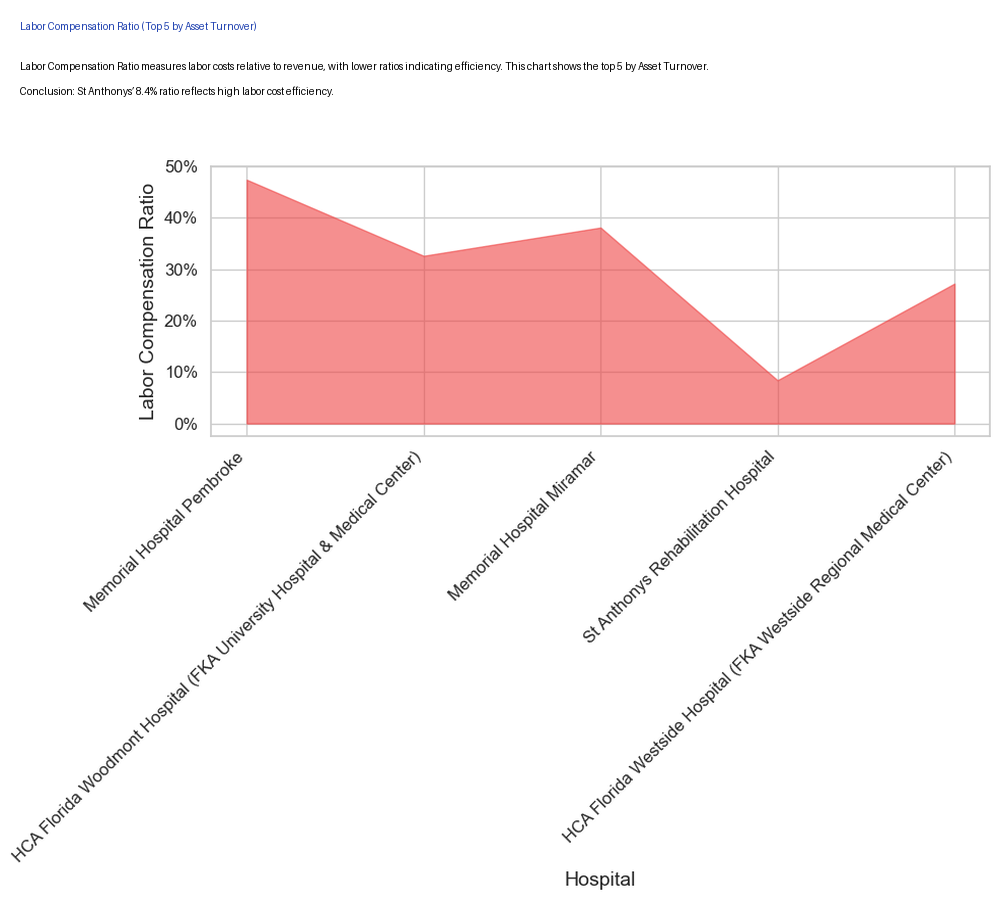

In [16]:
# Chart 6: Labor Compensation Ratio
chart = {
    "title": "Labor Compensation Ratio (Top 5 by Asset Turnover)",
    "description": "Labor Compensation Ratio measures labor costs relative to revenue, with lower ratios indicating efficiency. This chart shows the top 5 by Asset Turnover.\nConclusion: St Anthonys’ 8.4% ratio reflects high labor cost efficiency.",
    "type": "area",
    "data": df.sort_values("Asset Turnover", ascending=False).head(5)[["Hospital Name", "Labor Compensation Ratio"]],
    "x": "Hospital Name",
    "y": "Labor Compensation Ratio",
    "color": "#EF4444",
    "xlabel": "Hospital",
    "ylabel": "Labor Compensation Ratio"
}

try:
    # Create figure
    fig = plt.figure(figsize=(10, 7.5), dpi=100)
    plt.fill_between(chart["data"][chart["x"]], chart["data"][chart["y"]], color=chart["color"], alpha=0.6)
    plt.xlabel(chart["xlabel"], fontsize=14)
    plt.ylabel(chart["ylabel"], fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], [f"{x*100:.0f}%" for x in [0, 0.1, 0.2, 0.3, 0.4, 0.5]], fontsize=12)
    plt.tight_layout()
    
    # Save chart to memory
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
    plt.close()
    
    # Create final image
    final_image = Image.new('RGB', (1000, 900), 'white')
    draw = ImageDraw.Draw(final_image)
    
    # Load fonts
    try:
        title_font = ImageFont.truetype("arialbd.ttf", 20) if os.path.exists("arialbd.ttf") else \
                     ImageFont.truetype("DejaVuSans-Bold.ttf", 20) if os.path.exists("DejaVuSans-Bold.ttf") else \
                     ImageFont.truetype("LiberationSans-Bold.ttf", 20) if os.path.exists("LiberationSans-Bold.ttf") else \
                     ImageFont.truetype("Helvetica-Bold.ttf", 20) if os.path.exists("Helvetica-Bold.ttf") else \
                     ImageFont.load_default()
        text_font = ImageFont.truetype("arial.ttf", 16) if os.path.exists("arial.ttf") else \
                    ImageFont.truetype("DejaVuSans.ttf", 16) if os.path.exists("DejaVuSans.ttf") else \
                    ImageFont.truetype("LiberationSans-Regular.ttf", 16) if os.path.exists("LiberationSans-Regular.ttf") else \
                    ImageFont.truetype("Helvetica.ttf", 16) if os.path.exists("Helvetica.ttf") else \
                    ImageFont.load_default()
    except Exception as e:
        print(f"Font loading failed: {e}. Using default PIL font.")
        title_font = ImageFont.load_default()
        text_font = ImageFont.load_default()
    
    # Draw title and description
    draw.text((20, 20), chart["title"], fill="#1E40AF", font=title_font)
    wrapped_text = wrap_text(chart["description"], text_font, 960)
    y_text = 60
    for line in wrapped_text:
        draw.text((20, y_text), line, fill="black", font=text_font)
        y_text += 25
    
    # Paste chart image
    buf.seek(0)
    chart_image = Image.open(buf)
    chart_image = chart_image.resize((1000, 750), Image.Resampling.LANCZOS)
    final_image.paste(chart_image, (0, 150))
    
    # Display
    buf_display = BytesIO()
    final_image.save(buf_display, format='png')
    buf_display.seek(0)
    print(f"Chart 6: {chart['title']}")
    display(IPImage(buf_display.read()))
    buf.close()
    buf_display.close()
except Exception as e:
    print(f"Error generating Chart 6 ({chart['title']}): {e}")
    plt.close()